
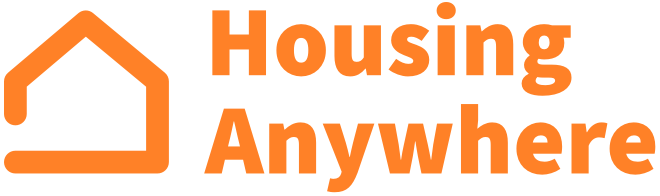</p>
    
# City Rankings - Safest Student Cities for International Students 

##### It is recommended to run this report in R version 3.5.0 or newer because most of the packages may not work in R below 3.5.0 version

This report is created to sort the cities based on the city safe level. The city safe level is determined by multiple score which taken from multiple sources. Thus, this report contains 3 main parts.
1. [Installing & Loading the package](#packages)<br>
    This part contains the packages required to build this report.
    
2. [Scrapping the table & Wrangling the data frame](#scrapping)<br>
    This part explains process of scrapping the sources of all relevant score to generate the city safe level. 
    
3. [Combining the all data frames](#combining)<br>
    This part is the final part of the report that results in the final tabel for marketing purpose.
    

## <a name="packages"></a> Installing & Loading the package

In [1]:
install.packages('rvest',repos='http://cran.us.r-project.org')
install.packages('XML',repos='http://cran.us.r-project.org')
install.packages('googlesheets',repos='http://cran.us.r-project.org')
install.packages('tm',repos='http://cran.us.r-project.org')
install.packages('httpuv',repos='http://cran.us.r-project.org')
install.packages('pdftools',repos='http://cran.us.r-project.org')
install.packages('clusterSim',repos='http://cran.us.r-project.org')
install.packages('data.table',repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/prome/R/win-library/3.5'
(as 'lib' is unspecified)


package 'rvest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\prome\AppData\Local\Temp\RtmpSoRVl7\downloaded_packages


Installing package into 'C:/Users/prome/R/win-library/3.5'
(as 'lib' is unspecified)


package 'XML' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\prome\AppData\Local\Temp\RtmpSoRVl7\downloaded_packages


Installing package into 'C:/Users/prome/R/win-library/3.5'
(as 'lib' is unspecified)


package 'googlesheets' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\prome\AppData\Local\Temp\RtmpSoRVl7\downloaded_packages


Installing package into 'C:/Users/prome/R/win-library/3.5'
(as 'lib' is unspecified)


package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\prome\AppData\Local\Temp\RtmpSoRVl7\downloaded_packages


Installing package into 'C:/Users/prome/R/win-library/3.5'
(as 'lib' is unspecified)


package 'httpuv' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\prome\AppData\Local\Temp\RtmpSoRVl7\downloaded_packages


Installing package into 'C:/Users/prome/R/win-library/3.5'
(as 'lib' is unspecified)


package 'pdftools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\prome\AppData\Local\Temp\RtmpSoRVl7\downloaded_packages


Installing package into 'C:/Users/prome/R/win-library/3.5'
(as 'lib' is unspecified)


package 'clusterSim' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\prome\AppData\Local\Temp\RtmpSoRVl7\downloaded_packages


Installing package into 'C:/Users/prome/R/win-library/3.5'
(as 'lib' is unspecified)


package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\prome\AppData\Local\Temp\RtmpSoRVl7\downloaded_packages


In [4]:
#Loading the rvest package. This is the main package to scrap the table
library('rvest')

#loading XML package. This is used to scrap the XML format table
library('XML')

#loading googlesheets package. This is used to scrap the table from google sheet
library('googlesheets')

#loading a library that connects to my googledrive
library('httpuv')

#loading googlesheets package. This is used to scrap the table from google sheet
library('tm')

#loading the dataframe package.
library('dplyr')

#loading the dataframe package.
library('data.table')

#loading the library to manipulate string.
library('stringr')

#loading the library to normalize data set.
library('clusterSim')


## <a name="scrapping"></a>Scrapping the tables from the website & Wrangling the data frame

There are 5 major variables constructing the city safe level. The five major variables and their elements can be explained as follows:
1. [Crime](#crime)<br>
    The variable of crime measures how safe the city is. This variable only contains the safety index score.
2. [Attitudes](#attitudes) <br>
    The variable of attitudes quantifies the civilization of the people within the city. The variable consists of the attitude total score and social progress index.
3. [Student Civil Society](#student_civil_society)<br>
    The variable of student civil society measures how welcome the city to foreign student is. This variable comprises the student mix score, the student view score,and the esn score.
4. [Transport](#transport) <br>
    This variable estimates how easy people travel within the city. The variable of transport contains the infrastructure score, uber coverage score, and expat transport score.
5. [Free Scammer Area](#free_scammer_area) <br>
    The variable of free scammer area implies to which extent a country has no fraudulent activity regarding accomodation rental. This variable consist of the non-scammer area score.

### <a name="crime"></a>Crime

This part uses the safety index from https://www.numbeo.com/crime/rankings.jsp

In [5]:
#Specifying the url for desired website to be scrapped
url_crime <- 'https://www.numbeo.com/crime/rankings.jsp'

#Reading the HTML code from the website
webpage_crime <- read_html(url_crime)

#Scrapping the crime table.
crime <- url_crime %>% 
    read_html()%>%
    html_nodes(xpath='//*[@id="t2"]')%>%
    html_table()
crime <- crime[[1]]
head(crime)

Rank,City,Crime Index,Safety Index
NA,"San Pedro Sula, Honduras",85.18,14.82
NA,"Caracas, Venezuela",82.55,17.45
NA,"Port Moresby, Papua New Guinea",80.68,19.32
NA,"Fortaleza, Brazil",80.61,19.39
NA,"Durban, South Africa",79.21,20.79
NA,"Johannesburg, South Africa",78.86,21.14


In [6]:
#Eliminating the uneccessary columns
crime_clean <- crime[c("City","Safety Index")]
colnames(crime_clean) <- c("city_country","safety_index")
head(crime_clean)
nrow(crime_clean)

city_country,safety_index
"San Pedro Sula, Honduras",14.82
"Caracas, Venezuela",17.45
"Port Moresby, Papua New Guinea",19.32
"Fortaleza, Brazil",19.39
"Durban, South Africa",20.79
"Johannesburg, South Africa",21.14


[1] 327

In [7]:
#spliting city name and  country name
crime_clean_1 <- str_split_fixed(crime_clean$city_country, ",", 2)
colnames(crime_clean_1) <- c("city","country")

#combining the 2 data frames
crime_final <- cbind(crime_clean_1,crime_clean)
crime_final <- crime_final[c("city","country","safety_index")]
head(crime_final)

#manipulating cities' name and  countries' name
crime_final$country<- as.character(crime_final$country)
crime_final$city<- as.character(crime_final$city)

#Removing space character in countries' name
crime_final$country<-substring(crime_final$country, 2)

#sanitizing countries's & cities'name
crime_final$country[grep("United States", crime_final$country)] <-"United States"
crime_final$city[grep("Rio De Janeiro", crime_final$city)] <-"Rio de Janeiro"
crime_final$city[grep("Tel Aviv-Yafo", crime_final$city)] <-"Tel Aviv"
crime_final$country[grep("Trinidad And Tobago", crime_final$country)] <-"Trinidad and Tobago"
crime_final$city[grep("Krakow", crime_final$city)] <-"Krakow"
crime_final$city[grep("Jeddah", crime_final$city)] <-"Jeddah"

#getting a sense of the unique city name
unique(crime_final$city)
unique(crime_final$country)


city,country,safety_index
San Pedro Sula,Honduras,14.82
Caracas,Venezuela,17.45
Port Moresby,Papua New Guinea,19.32
Fortaleza,Brazil,19.39
Durban,South Africa,20.79
Johannesburg,South Africa,21.14


[1] "San Pedro Sula"       "Caracas"              "Port Moresby"        
  [4] "Fortaleza"            "Durban"               "Johannesburg"        
  [7] "Salvador"             "Pretoria"             "Port Of Spain"       
 [10] "Recife"               "Porto Alegre"         "Rio de Janeiro"      
 [13] "San Salvador"         "Port Elizabeth"       "Sao Paulo"           
 [16] "Windhoek"             "Detroit"              "Dhaka"               
 [19] "Kingston"             "Baltimore"            "New Orleans"         
 [22] "Cape Town"            "Belo Horizonte"       "San Juan"            
 [25] "Lima"                 "Kuala Lumpur"         "Albuquerque"         
 [28] "Rosario"              "Santo Domingo"        "Saint Louis"         
 [31] "Mexico City"          "Lagos"                "Oakland"             
 [34] "Campinas"             "Chicago"              "Curitiba"            
 [37] "Male"                 "Petaling Jaya"        "Atlanta"             
 [40] "Gurgaon"              "Damascus"             "Brasilia"            
 [43] "Dar Es Salaam"        "Marseille"            "Townsville"          
 [46] "Milwaukee"            "Surrey"               "Darwin"              
 [49] "Buenos Aires"         "Karachi"              "Bogota"              
 [52] "Puebla"               "Houston"              "Quezon City"         
 [55] "Johor Bahru"          "Ulaanbaatar"          "Kansas City"         
 [58] "Nairobi"              "Tripoli"              "Delhi"               
 [61] "Manila"               "Philadelphia"         "Phuket"              
 [64] "Naples"               "Catania"              "Florianopolis"       
 [67] "Washington"           "Phoenix"              "Orlando"             
 [70] "Ho Chi Minh City"     "Rochester"            "Turin"               
 [73] "Kristiansand"         "Montevideo"           "Manchester"          
 [76] "Cairo"                "Phnom Penh"           "Pattaya"             
 [79] "Las Vegas"            "Regina"               "Brampton"            
 [82] "Rome"                 "Casablanca"           "Winnipeg"            
 [85] "Guadalajara"          "Miami"                "Tehran"              
 [88] "Quito"                "Baghdad"              "Jakarta"             
 [91] "San Jose"             "Paris"                "Birmingham"          
 [94] "Shenzhen"             "Alexandria"           "Tromso"              
 [97] "Harare"               "Ad Dammam"            "Tijuana"             
[100] "Hanoi"                "Brussels"             "Algiers"             
[103] "Hamburg"              "Cordoba"              "Dublin"              
[106] "Guangzhou"            "Monterrey"            "Bremen"              
[109] "Istanbul"             "Kuching"              "Malmo"               
[112] "Almaty"               "Beirut"               "Kolkata"             
[115] "Bangalore"            "Santiago"             "Athens"              
[118] "San Francisco"        "Tampa"                "Minneapolis"         
[121] "Saskatoon"            "Jeddah"               "Iloilo"              
[124] "Cologne"              "Los Angeles"          "Lodz"                
[127] "Panama City"          "Cincinnati"           "Beijing"             
[130] "Kiev"                 "Sacramento"           "London"              
[133] "Stockholm"            "San Antonio"          "Novosibirsk"         
[136] "Bangkok"              "Lahore"               "Kharkiv"             
[139] "Sarajevo"             "Kelowna"              "Auckland"            
[142] "Moscow"               "Mississauga"          "Barcelona"           
[145] "Kaunas"               "Skopje"               "Frankfurt"           
[148] "Medellin"             "Dallas"               "Columbus"            
[151] "Penang"               "Hamilton"             "Milan"               
[154] "Addis Ababa"          "Glasgow"              "New York"            
[157] "Sofia"                "Mumbai"               "Chisinau"            
[160] "Portland"           

[1] "Honduras"               "Venezuela"              "Papua New Guinea"      
  [4] "Brazil"                 "South Africa"           "Trinidad and Tobago"   
  [7] "El Salvador"            "Namibia"                "United States"         
 [10] "Bangladesh"             "Jamaica"                "Puerto Rico"           
 [13] "Peru"                   "Malaysia"               "Argentina"             
 [16] "Dominican Republic"     "Mexico"                 "Nigeria"               
 [19] "Maldives"               "India"                  "Syria"                 
 [22] "Tanzania"               "France"                 "Australia"             
 [25] "Canada"                 "Pakistan"               "Colombia"              
 [28] "Philippines"            "Mongolia"               "Kenya"                 
 [31] "Libya"                  "Thailand"               "Italy"                 
 [34] "Vietnam"                "Norway"                 "Uruguay"               
 [37] "United Kingdom"         "Egypt"                  "Cambodia"              
 [40] "Morocco"                "Iran"                   "Ecuador"               
 [43] "Iraq"                   "Indonesia"              "Costa Rica"            
 [46] "China"                  "Zimbabwe"               "Saudi Arabia"          
 [49] "Belgium"                "Algeria"                "Germany"               
 [52] "Ireland"                "Turkey"                 "Sweden"                
 [55] "Kazakhstan"             "Lebanon"                "Chile"                 
 [58] "Greece"                 "Poland"                 "Panama"                
 [61] "Ukraine"                "Russia"                 "Bosnia And Herzegovina"
 [64] "New Zealand"            "Spain"                  "Lithuania"             
 [67] "Macedonia"              "Ethiopia"               "Bulgaria"              
 [70] "Moldova"                "Serbia"                 "Portugal"              
 [73] "Israel"                 "Jordan"                 "South Korea"           
 [76] "Albania"                "Latvia"                 "Sri Lanka"             
 [79] "Hungary"                "Tunisia"                "Netherlands"           
 [82] "Nepal"                  "Kuwait"                 "Croatia"               
 [85] "Cyprus"                 "Slovakia"               "Switzerland"           
 [88] "Armenia"                "Bahrain"                "Romania"               
 [91] "Luxembourg"             "Czech Republic"         "Oman"                  
 [94] "Azerbaijan"             "Finland"                "Belarus"               
 [97] "Slovenia"               "Austria"                "Iceland"               
[100] "Denmark"                "Hong Kong"              "Estonia"               
[103] "Georgia"                "Taiwan"                 "United Arab Emirates"  
[106] "Japan"                  "Singapore"              "Qatar"

### <a name="attitudes"></a>Attitudes

This part obtain the data of attitude total of cities from https://travelbird.nl/most-welcoming-cities and socal progress index from https://www.socialprogressimperative.org/global-index/

#### Travel bird

In [8]:
#Specifying the url for desired website to be scrapped
url_attitude_1 <- 'https://travelbird.nl/most-welcoming-cities'

#Reading the HTML code from the website
webpage_attitude_1 <- read_html(url_attitude_1)

#Scrapping the table
attitude_1 <- url_attitude_1 %>% 
    read_html()%>%
    html_nodes(xpath='//*[@id="tb-mwc-table-chart-body-scroller"]/table')%>%
    html_table()
    
attitude_1 <- attitude_1[[1]]
head(attitude_1)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
1,Singapore,Singapore,7.9,10.00,8.95,6.16,7.82,8.60,8.65,8.22
2,Stockholm,Sweden,9.1,9.13,7.89,9.04,8.17,5.63,6.59,8.02
3,Helsinki,Finland,8.3,7.72,8.78,9.48,7.90,4.50,7.55,8.01
4,San Francisco,USA,8.0,7.38,6.80,8.43,9.30,3.80,8.46,8.00
5,Rotterdam,Netherlands,7.5,9.21,6.33,9.39,8.43,4.23,8.90,7.98
6,Lisbon,Portugal,9.2,3.27,8.08,2.14,6.33,3.01,7.81,7.90


In [9]:
#renaming the column names
#the column names are adjusted according to https://travelbird.nl/most-welcoming-cities
colnames(attitude_1) <- c("number","city","country","expert_opinion",
                         "port_of_entry","safety","happiness",
                         "english_profeciency",
                         "openness_to_host_tourist_at_home",
                        "tourism_carrying_capacity_by_city_and_residents",
                        "attitude_total")
attitude_1_final <-attitude_1
attitude_1_final <-attitude_1[c("city","country","attitude_total")]
head(attitude_1_final)

#manipulating countries' and cities' name
attitude_1_final$country<- as.character(attitude_1_final$country)
attitude_1_final$city<- as.character(attitude_1_final$city)

#sanitizing countries' and cities' name
attitude_1_final$country[grep("USA", attitude_1_final$country)] <-"United States"
attitude_1_final$country[grep("UAE", attitude_1_final$country)] <-"United Arab Emirates"
attitude_1_final$city[grep("São Paulo", attitude_1_final$city)] <-"Sao Paulo"
attitude_1_final$city[grep("Bogotá", attitude_1_final$city)] <-"Bogota"


#getting a sense of the unique city name
unique(attitude_1_final$city)
unique(attitude_1_final$country)

city,country,attitude_total
Singapore,Singapore,8.22
Stockholm,Sweden,8.02
Helsinki,Finland,8.01
San Francisco,USA,8.00
Rotterdam,Netherlands,7.98
Lisbon,Portugal,7.90


[1] "Singapore"      "Stockholm"      "Helsinki"       "San Francisco" 
  [5] "Rotterdam"      "Lisbon"         "Tokyo"          "Oslo"          
  [9] "Zurich"         "Orlando"        "Hamburg"        "Copenhagen"    
 [13] "Dublin"         "Toronto"        "Nice"           "Bruges"        
 [17] "Geneva"         "New York"       "Berlin"         "Phuket"        
 [21] "Dubai"          "Abu Dhabi"      "Kathmandu"      "Stuttgart"     
 [25] "Gothenburg"     "Munich"         "Bern"           "Auckland"      
 [29] "London"         "Doha"           "Glasgow"        "Macau"         
 [33] "Edinburgh"      "Lima"           "Brussels"       "Manama"        
 [37] "Liverpool"      "Beirut"         "Tel Aviv"       "Kuwait City"   
 [41] "Vienna"         "Madrid"         "Las Vegas"      "Shanghai"      
 [45] "Miami"          "Bangkok"        "Marrakech"      "Prague"        
 [49] "Los Angeles"    "Muscat"         "Graz"           "Amsterdam"     
 [53] "Monaco"         "Taipei"         "Sydney"         "Jakarta"       
 [57] "St. Petersburg" "Amman"          "Seoul"          "Milan"         
 [61] "Antwerp"        "New Delhi"      "Toulouse"       "Athens"        
 [65] "Paris"          "Hong Kong"      "Frankfurt"      "Melbourne"     
 [69] "Lille"          "Chengdu"        "Rome"           "Reykjavik"     
 [73] "Buenos Aires"   "Bogota"         "Beijing"        "Sofia"         
 [77] "Venice"         "Barcelona"      "Warsaw"         "Johannesburg"  
 [81] "Manila"         "Denpasar"       "Nantes"         "Mexico City"   
 [85] "Kuala Lumpur"   "Kiev"           "Mumbai"         "Istanbul"      
 [89] "Rio de Janeiro" "Jeddah"         "Sao Paulo"      "Guangzhou"     
 [93] "Nairobi"        "Cairo"          "Phnom Penh"     "Colombo"       
 [97] "Moscow"         "Hanoi"          "Bucharest"      "Budapest"

[1] "Singapore"            "Sweden"               "Finland"             
 [4] "United States"        "Netherlands"          "Portugal"            
 [7] "Japan"                "Norway"               "Switzerland"         
[10] "Germany"              "Denmark"              "Ireland"             
[13] "Canada"               "France"               "Belgium"             
[16] "Thailand"             "United Arab Emirates" "Nepal"               
[19] "New Zealand"          "United Kingdom"       "Qatar"               
[22] "China"                "Peru"                 "Bahrain"             
[25] "Lebanon"              "Israel"               "Kuwait"              
[28] "Austria"              "Spain"                "Morocco"             
[31] "Czech Republic"       "Oman"                 "Monaco"              
[34] "Taiwan"               "Australia"            "Indonesia"           
[37] "Russia"               "Jordan"               "South Korea"         
[40] "Italy"                "India"                "Greece"              
[43] "Iceland"              "Argentina"            "Colombia"            
[46] "Bulgaria"             "Poland"               "South Africa"        
[49] "Philippines"          "Mexico"               "Malaysia"            
[52] "Ukraine"              "Turkey"               "Brazil"              
[55] "Saudi Arabia"         "Kenya"                "Egypt"               
[58] "Cambodia"             "Sri Lanka"            "Vietnam"             
[61] "Romania"              "Hungary"

### social progress index

In [10]:
attitude_2 <-  read.csv(file='social_progress_index.csv', header=TRUE)
head(attitude_2)

Country,Country.Code,Social.Progress.Index,Basic.Human.Needs,Foundations.of.Wellbeing,Opportunity,Nutrition.and.Basic.Medical.Care,Water.and.Sanitation,Shelter,Personal.Safety,...,Globally.ranked.universities,Percentage.of.tertiary.students.enrolled.in.globally.ranked.universities,Depth.of.food.deficit...capped,Adult.literacy.rate...capped,Secondary.school.enrollment...capped,Gender.parity.in.secondary.enrollment...difference.from.parity,Mobile.telephone.subscriptions...capped,Greenhouse.gas.emissions...capped,Globally.ranked.universities...bucketed,Percentage.of.tertiary.students.enrolled.in.globally.ranked.universities...bucketed
Afghanistan,AFG,35.66,42.65,38.00,26.34,72.74,29.33,22.92,45.63,...,0,0.00,173,38.17,55.64,0.44,61.58,544.79,0,0
Albania,ALB,70.97,85.53,78.35,49.04,98.17,90.69,80.45,72.82,...,0,0.00,8,97.55,95.77,0.06,100.00,257.69,0,0
Algeria,DZA,65.41,78.15,77.09,40.98,95.01,81.23,70.58,65.77,...,1,0.03,20,79.61,99.86,0.04,100.00,380.96,1,1
Angola,AGO,40.73,44.37,48.76,29.05,69.33,27.63,28.49,52.04,...,0,0.00,90,71.16,28.90,0.35,60.84,995.89,0,0
Argentina,ARG,75.90,81.71,79.41,66.58,97.34,98.32,67.25,63.92,...,20,0.23,8,98.09,100.00,0.07,100.00,NA,6,4
Armenia,ARM,69.01,85.83,76.49,44.70,96.85,96.42,77.71,72.32,...,0,0.00,41,99.00,88.50,0.01,100.00,393.71,0,0


In [11]:
attitude_2_final <- attitude_2[c("Country","Social.Progress.Index")]
colnames(attitude_2_final) <- c("country","social_progress_index")
head(attitude_2_final)

#manipulating countries' and cities' name
attitude_2_final$country<- as.character(attitude_2_final$country)

#sanitizing countries' and cities' name
attitude_2_final$country[grep("Côte d'Ivoire", attitude_2_final$country)] <-"Cote d'Ivoire"

#getting a sense of the unique city's or country's name
unique(attitude_2_final$country)

country,social_progress_index
Afghanistan,35.66
Albania,70.97
Algeria,65.41
Angola,40.73
Argentina,75.90
Armenia,69.01


[1] "Afghanistan"                    "Albania"                       
  [3] "Algeria"                        "Angola"                        
  [5] "Argentina"                      "Armenia"                       
  [7] "Australia"                      "Austria"                       
  [9] "Azerbaijan"                     "Bangladesh"                    
 [11] "Belarus"                        "Belgium"                       
 [13] "Benin"                          "Bolivia"                       
 [15] "Botswana"                       "Brazil"                        
 [17] "Bulgaria"                       "Burkina Faso"                  
 [19] "Cambodia"                       "Cameroon"                      
 [21] "Canada"                         "Central African Republic"      
 [23] "Chad"                           "Chile"                         
 [25] "China"                          "Colombia"                      
 [27] "Congo, Republic of"             "Costa Rica"                    
 [29] "Cote d'Ivoire"                  "Croatia"                       
 [31] "Cyprus"                         "Czech Republic"                
 [33] "Denmark"                        "Dominican Republic"            
 [35] "Ecuador"                        "Egypt"                         
 [37] "El Salvador"                    "Estonia"                       
 [39] "Ethiopia"                       "Finland"                       
 [41] "France"                         "Georgia"                       
 [43] "Germany"                        "Ghana"                         
 [45] "Greece"                         "Guatemala"                     
 [47] "Guinea"                         "Honduras"                      
 [49] "Hungary"                        "Iceland"                       
 [51] "India"                          "Indonesia"                     
 [53] "Iran"                           "Ireland"                       
 [55] "Israel"                         "Italy"                         
 [57] "Jamaica"                        "Japan"                         
 [59] "Jordan"                         "Kazakhstan"                    
 [61] "Kenya"                          "Korea, Republic of"            
 [63] "Kuwait"                         "Kyrgyzstan"                    
 [65] "Laos"                           "Latvia"                        
 [67] "Lebanon"                        "Lesotho"                       
 [69] "Liberia"                        "Lithuania"                     
 [71] "Macedonia"                      "Madagascar"                    
 [73] "Malawi"                         "Malaysia"                      
 [75] "Mali"                           "Mauritania"                    
 [77] "Mauritius"                      "Mexico"                        
 [79] "Moldova"                        "Mongolia"                      
 [81] "Montenegro"                     "Morocco"                       
 [83] "Mozambique"                     "Myanmar"                       
 [85] "Namibia"                        "Nepal"                         
 [87] "Netherlands"                    "New Zealand"                   
 [89] "Nicaragua"                      "Niger"                         
 [91] "Nigeria"                        "Norway"                        
 [93] "Pakistan"                       "Panama"                        
 [95] "Paraguay"                       "Peru"                          
 [97] "Philippines"                    "Poland"                        
 [99] "Portugal"                       "Romania"                       
[101] "Russia"                         "Rwanda"                        
[103] "Saudi Arabia"                   "Senegal"                       
[105] "Serbia"                         "Sierra Leone"                  
[107] "Slovakia"                       "Slovenia"                      
[109] "South Africa"                   "Spain"                         
[111] "Sri Lanka"                      "Sw

### <a name="student_civil_society"></a> Student civil society


This part obtain the information of student mix and student view from https://www.topuniversities.com/city-rankings/2018 and the esn score from the google sheet name *Copy of ESN Sections*. Basically the ESN score is a binary score to which extent the city has a ESN that might be helpful for students.

#### QS Best Student Cities

In [12]:
#The table needs to be downloaded first as html file
#original url source: https://www.topuniversities.com/city-rankings/2018

#Specifying the url or directory for desired website to be scrapped
url_ssc_1 <- 'QS Best Student Cities 2018 _ Top Universities.html'

#Reading the HTML code from the website
webpage_ssc_1 <- read_html(url_ssc_1)

#Scrapping the table
ssc_1 <- url_ssc_1 %>% 
    read_html()%>%
    html_table()
ssc_1 <- ssc_1[[3]]
head(ssc_1)

# RANK20182017201620152018,CITY,OVERALL SCORE,Affordability,Employer Activity,Desirability,Student Mix,Rankings,Student View
1,London,482,25,93,80,92,100,92
2,Tokyo,479,54,100,97,55,84,89
3,Melbourne,475,33,86,91,100,68,98
4,Montreal,465,47,80,89,94,57,100
5,Paris,463,38,88,80,80,93,84
6,Munich,460,67,78,89,74,54,99


In [13]:
ssc_1_final <-ssc_1[c("CITY","Student Mix","Student View")]
colnames(ssc_1_final) <- c("city","student_mix","student_view")
head(ssc_1_final)

#getting a sense of the unique city name
unique(ssc_1_final$city)

city,student_mix,student_view
London,92,92
Tokyo,55,89
Melbourne,100,98
Montreal,94,100
Paris,80,84
Munich,74,99


[1] "London"              "Tokyo"               "Melbourne"          
  [4] "Montreal"            "Paris"               "Munich"             
  [7] "Berlin"              "Zurich"              "Sydney"             
 [10] "Seoul"               "Vienna"              "Hong Kong"          
 [13] "Boston"              "Toronto"             "Singapore"          
 [16] "Edinburgh"           "Vancouver"           "New York"           
 [19] "Kyoto-Osaka-Kobe"    "Taipei"              "Brisbane"           
 [22] "Canberra"            "Auckland"            "Manchester"         
 [25] "Buenos Aires"        "Beijing"             "Amsterdam"          
 [28] "Moscow"              "Shanghai"            "Prague"             
 [31] "Barcelona"           "Madrid"              "Stockholm"          
 [34] "Dublin"              "Los Angeles"         "Milan"              
 [37] "Kuala Lumpur"        "San Francisco"       "Perth"              
 [40] "Chicago"             "Adelaide"            "Lyon"               
 [43] "Glasgow"             "Coventry"            "Copenhagen"         
 [46] "Ottawa"              "Nottingham"          "Brussels"           
 [49] "Budapest"            "Lisbon"              "Birmingham"         
 [52] "Mexico City"         "Warsaw"              "Bangkok"            
 [55] "Aberdeen"            "Newcastle Upon Tyne" "Gothenburg"         
 [58] "Philadelphia"        "Stuttgart"           "Washington DC"      
 [61] "Dubai-Sharjah-Ajman" "Atlanta"             "Brno"               
 [64] "Santiago"            "Oslo"                "Rome"               
 [67] "Istanbul"            "Pittsburgh"          "Christchurch"       
 [70] "Sao Paulo"           "Cape Town"           "Riyadh"             
 [73] "Hsinchu"             "Tomsk"               "Helsinki"           
 [76] "Athens"              "St. Petersburg"      "Toulouse"           
 [79] "Johannesburg"        "San Diego"           "Bogota"             
 [82] "Ankara"              "Monterrey"           "Vilnius"            
 [85] "Graz"                "Daejeon"             "Gold Coast"         
 [88] "Nanjing"             "Quebec"              "Baltimore"          
 [91] "Valencia"            "Brighton"            "Nagoya"             
 [94] "Cairo"               "Manila"              "Novosibirsk"        
 [97] "Houston"             "Montpellier"         "Mumbai"             
[100] "Miami"               "Rio de Janeiro"

#### ESN

In [14]:
#The source related to ESN is a google sheet file. Thus, an autenthication to access the file is required
#google sheet authentication
gs_auth(new_user = TRUE)

Disabling .httr-oauth by renaming to .httr-oauth-SUSPENDED
No token currently in force.
Waiting for authentication in browser...
Press Esc/Ctrl + C to abort
Please point your browser to the following url: 
https://accounts.google.com/o/oauth2/auth?client_id=178989665258-f4scmimctv2o96isfppehg1qesrpvjro.apps.googleusercontent.com&scope=https%3A%2F%2Fspreadsheets.google.com%2Ffeeds%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&redirect_uri=http%3A%2F%2Flocalhost%3A1410%2F&response_type=code&state=OG0Belc8CO
Authentication complete.


In [15]:
esn <- gs_title("Copy of ESN Sections")

Sheet successfully identified: "Copy of ESN Sections"


In [16]:
esn_final <- gs_read(esn, ws="Pivot Table 1")

Accessing worksheet titled 'Pivot Table 1'.
Parsed with column specification:
cols(
  city = col_character()
)


In [17]:
esn_final$esn_score <- 1
head(esn_final)

#getting a sense of the unique city name
unique(esn_final$city)
nrow(esn_final)

city,esn_score
A Coruña,1
Aarhus,1
Aas,1
Aberdeen,1
Adana,1
Adana-Mersin,1


[1] "A Coruña"                          "Aarhus"                           
  [3] "Aas"                               "Aberdeen"                         
  [5] "Adana"                             "Adana-Mersin"                     
  [7] "Aix-en-Provence"                   "Alba Iulia"                       
  [9] "Albacete"                          "Alcalá de Henares"                
 [11] "Alicante"                          "Almería"                          
 [13] "Alta"                              "Amiens"                           
 [15] "Amsterdam"                         "Ancona"                           
 [17] "Ankara"                            "Antalya"                          
 [19] "Antwerp"                           "Athens"                           
 [21] "Augsburg"                          "Aveiro"                           
 [23] "Avignon"                           "Bacau"                            
 [25] "Badajoz"                           "Baku"                             
 [27] "Baleares"                          "Banská Bystrica"                  
 [29] "Barcelona"                         "Bari"                             
 [31] "Basel"                             "Bayreuth"                         
 [33] "Belfort"                           "Belgrade"                         
 [35] "Benevento"                         "Bergamo"                          
 [37] "Bergen"                            "Berlin"                           
 [39] "Bern"                              "Besancon"                         
 [41] "Bialystok"                         "Bilbao"                           
 [43] "Blagoevgrad"                       "Bochum"                           
 [45] "Bologna"                           "Bolu"                             
 [47] "Bonn"                              "Borås"                            
 [49] "Bordeaux"                          "Braga and Guimarães"              
 [51] "Bragança"                          "Brasov"                           
 [53] "Bratislava"                        "Braunschweig"                     
 [55] "Breda"                             "Brescia"                          
 [57] "Brest"                             "Bristol"                          
 [59] "Brno"                              "Brussels"                         
 [61] "Bucharest"                         "Budapest"                         
 [63] "Budweis"                           "Bursa"                            
 [65] "Bydgoszcz"                         "Cádiz"                            
 [67] "Cagliari"                          "Camerino"                         
 [69] "Campobasso"                        "Çanakkale"                        
 [71] "Cardiff"                           "Cartagena"                        
 [73] "Castellanza"                       "Castellón de la Plana (Castellón)"
 [75] "Castelo Branco and Idanha-a-Nova"  "Catania"                          
 [77] "Catanzaro"                         "Chania"                           
 [79] "Chur"                              "Clermont-Ferrand"                 
 [81] "Cluj-Napoca"                       "Coimbra"                          
 [83] "Community of Madrid"               "Compiegne"                        
 [85] "Constanta"                         "Copenhagen"                       
 [87] "Corte"                             "Cosenza"                          
 [89] "Covilhã"                           "Craiova"                          
 [91] "Czetochowa"                        "Debrecen"                         
 [93] "Deggendorf"                        "Delft"                            
 [95] "Diemen"                            "Dijon"                            
 [97] "Dortmund"                          "Dresden"                          
 [99] "Dublin"                            "Dubrovnik"                        
[101] "Dundalk"                           "Düsseldorf"                       
[103] "Edirne"          

[1] 393

### <a name="transport"></a> Transport

This part obtains the infrastructure score from https://lpi.worldbank.org/international/global?sort=desc&order=Infrastructure#datatable, the uber coverage score from 'https://www.uber.com/en-NL/cities/', and the expat transport score from https://www.internations.org/expat-insider/2017/quality-of-urban-living-index-39280. Uber coverage score is a binary score that determine if Uber cover a particular city.

#### country infrastructure ranking

In [18]:
#Specifying the url for desired website to be scrapped
url_transport_1 <- 'https://lpi.worldbank.org/international/global?sort=desc&order=Infrastructure#datatable'

#Reading the HTML code from the website
webpage_transport_1 <- read_html(url_transport_1)

#Scrapping the table
transport_1 <- url_transport_1 %>% 
    read_html()%>%
    html_nodes(xpath='//*[@id="table-area"]/div/table[1]')%>%
    html_table()
    
transport_1 <- transport_1[[1]]
head(transport_1)

Country,Year,LPI Rank,LPI Score,Customs,Customs,Infrastructure,Infrastructure,International shipments,International shipments,Logistics competence,Logistics competence,Tracking & tracing,Tracking & tracing,Timeliness,Timeliness
Syrian Arab Republic,2016,160,1.60,160,1.11,160,1.24,160,1.36,160,1.39,138,2.10,147,2.40
Haiti,2016,159,1.72,158,1.70,159,1.47,159,1.81,159,1.68,158,1.56,160,2.02
Equatorial Guinea,2016,156,1.88,154,1.88,158,1.50,156,1.89,157,1.75,152,1.89,153,2.32
Mauritania,2016,157,1.87,131,2.14,157,1.54,154,2.00,158,1.74,159,1.54,157,2.14
Somalia,2016,158,1.75,159,1.29,156,1.57,157,1.86,156,1.85,160,1.51,152,2.35
Lao PDR,2016,152,2.07,155,1.85,155,1.76,148,2.18,144,2.10,156,1.76,133,2.68


In [19]:
#taking the neccessary columns
transport_1_final <-transport_1[c(1,8)]
colnames(transport_1_final) <- c("country","infrastructure")
head(transport_1_final)

#manipulating countries' and cities' name
transport_1_final$country<- as.character(transport_1_final$country)

#sanitizing countries' and cities' name
transport_1_final$country[grep("Egypt, Arab Rep", transport_1_final$country)] <-"Egypt"
transport_1_final$country[grep("Iran, Islamic Rep", transport_1_final$country)] <-"Iran"
transport_1_final$country[grep("São Tomé and Príncipe", transport_1_final$country)] <-"Sao Tome and Principe"

#getting a sense of the unique city's or country's name
unique(transport_1_final$country)

country,infrastructure
Syrian Arab Republic,1.24
Haiti,1.47
Equatorial Guinea,1.50
Mauritania,1.54
Somalia,1.57
Lao PDR,1.76


[1] "Syrian Arab Republic"   "Haiti"                  "Equatorial Guinea"     
  [4] "Mauritania"             "Somalia"                "Lao PDR"               
  [7] "Afghanistan"            "Iraq"                   "Guinea-Bissau"         
 [10] "Bhutan"                 "Kyrgyz Republic"        "Lesotho"               
 [13] "Albania"                "Burundi"                "Congo, Dem. Rep."      
 [16] "Guinea"                 "Liberia"                "Honduras"              
 [19] "Libya"                  "Gabon"                  "Mongolia"              
 [22] "Eritrea"                "Montenegro"             "Sierra Leone"          
 [25] "Chad"                   "Belarus"                "Bolivia"               
 [28] "Ethiopia"               "Sao Tome and Principe"  "Madagascar"            
 [31] "Tajikistan"             "Angola"                 "Georgia"               
 [34] "Guatemala"              "Sudan"                  "Cameroon"              
 [37] "Solomon Islands"        "Zimbabwe"               "Armenia"               
 [40] "Niger"                  "Jamaica"                "Senegal"               
 [43] "Guyana"                 "Togo"                   "Mozambique"            
 [46] "Fiji"                   "El Salvador"            "Zambia"                
 [49] "Nepal"                  "Dominican Republic"     "Djibouti"              
 [52] "Mali"                   "Cuba"                   "Costa Rica"            
 [55] "Papua New Guinea"       "Myanmar"                "Trinidad and Tobago"   
 [58] "Turkmenistan"           "Venezuela, RB"          "Bulgaria"              
 [61] "Moldova"                "Cambodia"               "Comoros"               
 [64] "Benin"                  "Nigeria"                "Colombia"              
 [67] "Russian Federation"     "Tunisia"                "Paraguay"              
 [70] "Uzbekistan"             "Morocco"                "Cote d'Ivoire"         
 [73] "Ecuador"                "Bangladesh"             "Ghana"                 
 [76] "Serbia"                 "Ukraine"                "Nicaragua"             
 [79] "Philippines"            "Maldives"               "Algeria"               
 [82] "Macedonia, FYR"         "Congo, Rep."            "Bosnia and Herzegovina"
 [85] "Rwanda"                 "Peru"                   "Lebanon"               
 [88] "Indonesia"              "Iran"                   "Burkina Faso"          
 [91] "Vietnam"                "Pakistan"               "Bahamas, The"          
 [94] "Uganda"                 "Brunei"                 "Kazakhstan"            
 [97] "Namibia"                "Chile"                  "Jordan"                
[100] "Uruguay"                "Tanzania"               "Argentina"             
[103] "Romania"                "Mexico"                 "Kuwait"                
[106] "Malta"                  "Botswana"               "Croatia"               
[109] "Cyprus"                 "Iceland"                "Egypt"                 
[112] "Portugal"               "Bahrain"                "Brazil"                
[115] "Thailand"               "Poland"                 "Estonia"               
[118] "Slovenia"               "Kenya"                  "Latvia"                
[121] "Saudi Arabia"           "Slovak Republic"        "Panama"                
[124] "Greece"                 "India"                  "Czech Republic"        
[127] "Oman"                   "Malaysia"               "Hungary"               
[130] "Turkey"                 "Israel"                 "New Zealand"           
[133] "Qatar"                  "Lithuania"              "Taiwan"                
[136] "Spain"                  "Denmark"                "China"                 
[139] "Ireland"                "South Africa"           "Korea, Rep."           
[142] "Italy"                  "Australia"              "Norway"                
[145] "Finland"                "France"                 "Belgium"               
[148] "United Arab Emirates"   "A

####  Uber coverage

In [20]:
#Specifying the url for desired website to be scrapped
url_transport_2 <- 'https://www.uber.com/en-NL/cities/'

#Reading the HTML code from the website
webpage_transport_2 <- read_html(url_transport_2)

#Scrapping the table
#using the DOM parsing approach
transport_2_html <- html_nodes(webpage_transport_2,'._style_4tSdda')
transport_2 <- html_text(transport_2_html)

#Let's have a look at the rankings
head(transport_2)

[1] "Abilene"        "Aguascalientes" "Akron"          "Albuquerque"   
[5] "Amarillo"       "Ames"

In [21]:
#converting characters to a dataframe
transport_2_final <- as.data.frame(transport_2)

#renaming the column name
colnames(transport_2_final) <- c("city")
transport_2_final$uber_score <- 1
head(transport_2_final)

#manipulating cities' name and  countries' name
transport_2_final$city<- as.character(transport_2_final$city)

#sanitizing countries's & cities'name
transport_2_final$city[grep("Rio De Janeiro", transport_2_final$city)] <-"Rio de Janeiro"

#getting a sense of the unique city name
unique(transport_2_final$city)

city,uber_score
Abilene,1
Aguascalientes,1
Akron,1
Albuquerque,1
Amarillo,1
Ames,1


[1] "Abilene"                      "Aguascalientes"              
  [3] "Akron"                        "Albuquerque"                 
  [5] "Amarillo"                     "Ames"                        
  [7] "Anchorage"                    "Ann Arbor"                   
  [9] "Asheville, NC"                "Athens"                      
 [11] "Atlanta"                      "Augusta"                     
 [13] "Austin"                       "Bakersfield"                 
 [15] "Baltimore-Maryland"           "Baton Rouge"                 
 [17] "Beaumont"                     "Bellingham"                  
 [19] "Big Island"                   "Billings"                    
 [21] "Birmingham, AL"               "Bismarck"                    
 [23] "Bloomington, IN"              "Boise"                       
 [25] "Boone"                        "Boston"                      
 [27] "Bowling Green, KY"            "Bozeman"                     
 [29] "Calgary"                      "Campeche"                    
 [31] "Cancun"                       "Carbondale"                  
 [33] "Cedar Rapids"                 "Celaya"                      
 [35] "Central Atlantic Coast, FL"   "Central Oregon"              
 [37] "Champaign"                    "Charleston, SC"              
 [39] "Charlotte"                    "Charlottesville-Harrisonburg"
 [41] "Chattanooga"                  "Chicago"                     
 [43] "Chihuahua"                    "Cincinnati"                  
 [45] "Ciudad Juarez"                "Ciudad Obregon"              
 [47] "Cleveland"                    "Coastal Georgia"             
 [49] "Coeur D'Alene"                "College Station"             
 [51] "Colorado Springs"             "Columbia, MO"                
 [53] "Columbia, SC"                 "Columbus"                    
 [55] "Columbus, GA"                 "Connecticut"                 
 [57] "Cookeville"                   "Corpus Christi"              
 [59] "Cuernavaca"                   "Culiacan"                    
 [61] "Dallas-Fort Worth"            "Dayton"                      
 [63] "Delaware"                     "Denver"                      
 [65] "Des Moines"                   "Detroit"                     
 [67] "DuBois"                       "Dubuque"                     
 [69] "Duluth"                       "Eagle Pass"                  
 [71] "Eastern Idaho"                "Eastern North Carolina"      
 [73] "Eastern Shore"                "Eastern Washington"          
 [75] "Eastern WV"                   "Eau Claire"                  
 [77] "Edmonton"                     "El Paso"                     
 [79] "Erie"                         "Evansville, IN"              
 [81] "Fairbanks"                    "Fargo - Moorhead"            
 [83] "Fayetteville, AR"             "Fayetteville, NC"            
 [85] "Flagstaff"                    "Flint"                       
 [87] "Florence, SC"                 "Florida Keys"                
 [89] "Fort Collins"                 "Fort Myers-Naples"           
 [91] "Fort Wayne"                   "Fresno"                      
 [93] "Gainesville"                  "Gallup"                      
 [95] "Gatineau"                     "Golden Triangle"             
 [97] "Grand Forks"                  "Grand Rapids"                
 [99] "Greater Maine"                "Greater Williamsport"        
[101] "Green Bay"                    "Greenville, SC"              
[103] "Guadalajara"                  "Guanajuato"                  
[105] "Guasave"                      "Guaymas"                     
[107] "Gulfport-Biloxi"              "Hamilton"                    
[109] "Hampton Roads"                "Harrisburg"                  
[111] "Hattiesburg, MS"              "Hermosillo"                  
[113] "Honolulu"                     "Houston"                     
[115] "Huntsville, AL"               "Indianapolis"                
[117] "Inland Empire"                "Iowa City"          

#### Expat transportation index

In [22]:
#The table is in image file located in https://www.internations.org/expat-insider/2017/quality-of-urban-living-index-39280
#The table inside the image was extracted using Photron Image Translator and saved as csv

#loading csv file
transport_3 <-  read.csv(file='expat insider 2017 - transportation.csv', header=TRUE)
head(transport_3)

X,Transportation
1,Zurich
2,Prague
3,Seoul
4,Basel
5,Vienna
6,Hamburg


In [42]:
#renanimg the column name
transport_3_final <- transport_3
colnames(transport_3_final) <- c("rank","city")
transport_3_final$expat_transport_score <- (1-data.Normalization(transport_3_final$rank, type="n1", normalization="column"))
head(transport_3_final)

#getting a sense of the unique city name
unique(transport_3_final$city)

rank,city,expat_transport_score
1,Zurich,2.681682
2,Prague,2.614415
3,Seoul,2.547147
4,Basel,2.479880
5,Vienna,2.412613
6,Hamburg,2.345346


[1] Zurich          Prague          Seoul           Basel          
 [5] Vienna          Hamburg         Tokyo           Stockholm      
 [9] Budapest        Barcelona       Madrid          The Hague      
[13] Copenhagen      Geneva          Amsterdam       Berlin         
[17] Munich          Frankfurt       Paris           Moscow         
[21] Shanghai        Warsaw          Beijing         London         
[25] Milan           Luxembourg City New York, NY    Istanbul       
[29] Dubai           Bangkok         Brussels        Abu Dhabi      
[33] Toronto         Kuala Lumpur    Santiago        Dublin         
[37] Mexico City     Manama          Sydney          Auckland       
[41] Cape Town       Sao Paulo       Muscat          Riyadh         
[45] Johannesburg    Kampala         Doha            Jeddah         
[49] Jakarta         Nairobi         Lagos          
51 Levels: Abu Dhabi Amsterdam Auckland Bangkok Barcelona Basel ... Zurich

### <a name="free_scammer_area"></a> Housing Scams

This part shows how many incoming internationals witnessed/experienced attempted fraud. The numbers are taken from  http://houserasmus.eu/sites/default/files/HE%2B_Final_Research_Report.pdf page 61

#### HousErasmus+

In [43]:
#copying data from the pdf file
scam_1 = as.data.frame(matrix(
    c("Ireland",0.28,
      "Turkey",0.22,
      "Sweden",0.18,
      "Iceland",0.18,
      "Denmark",0.17,
      "Italy",0.17,
      "Portugal",0.16,
      "Latvia",0.15,
      "Germany",0.14,
      "Croatia",0.13,
      "Estonia",0.13,
      "Slovenia",0.13,
      "Netherlands",0.13,
      "Hungary",0.12,
      "Belgium",0.12,
      "Poland",0.12,
      "Bulgaria",0.11,
      "Spain",0.11,
      "United Kingdom",0.11,
      "France",0.11,
      "Greece",0.09,
      "Austria",0.08,
      "Romania",0.06,
      "Lithuania",0.05,
      "Czech Republic",0.05,
      "Finland",0.03,
      "Slovakia",0.01,
      "Norway",0.00  
     ),
    ncol=2,
    byrow=TRUE
    ))
colnames(scam_1) <- c("country","share_of_students_facing_scam")
scam_1_final <- scam_1
scam_1_final$share_of_students_facing_scam <- as.numeric(as.character(scam_1_final$share_of_students_facing_scam))
scam_1_final$non_scammer_area_score <- 1- (scam_1_final$share_of_students_facing_scam)
head(scam_1_final)


#getting a sense of the unique city's or country's name
unique(scam_1_final$country)

country,share_of_students_facing_scam,non_scammer_area_score
Ireland,0.28,0.72
Turkey,0.22,0.78
Sweden,0.18,0.82
Iceland,0.18,0.82
Denmark,0.17,0.83
Italy,0.17,0.83


[1] Ireland        Turkey         Sweden         Iceland        Denmark       
 [6] Italy          Portugal       Latvia         Germany        Croatia       
[11] Estonia        Slovenia       Netherlands    Hungary        Belgium       
[16] Poland         Bulgaria       Spain          United Kingdom France        
[21] Greece         Austria        Romania        Lithuania      Czech Republic
[26] Finland        Slovakia       Norway        
28 Levels: Austria Belgium Bulgaria Croatia Czech Republic Denmark ... United Kingdom

## <a name="combining"></a>Combining the all data frames

Merging all the dataframes created above. Some of them are joined by the cities' name. Meanwhile, some of them are joined by the countries' name. Only one of them are joined by bith cities' name and countries' name

In [44]:
#Merging by ID
merge_1 <- merge(esn_final,crime_final,by="city",all=T)
merge_2 <- merge(merge_1,attitude_1_final,by=c("city","country"),all=T)
merge_3 <- merge(merge_2,attitude_2_final,by=c("country"),all=T)
merge_4 <- merge(merge_3,ssc_1_final,by=c("city"),all=T)
merge_5 <- merge(merge_4,transport_1_final,by=c("country"),all=T)
merge_6 <- merge(merge_5,transport_2_final,by=c("city"),all=T)
merge_7 <- merge(merge_6,transport_3_final,by=c("city"),all=T)
merge_8 <- merge(merge_7,scam_1_final,by=c("country"),all=T)

#replacing NA with 0
merge_8[is.na(merge_8)] <- 0



Since the measurements used various unit of measurements,the calculation will be valid if it uses normalized value ($Z_{score}$). The formula 
to calculate the normalized value is

$Z_{score}$ =
$\frac{X-\mu}{\sigma}$

Where $\mu$ and $\sigma$ is the mean and the standard deviation of each variable respectively.

In [45]:
#normalize the data using standard deviation to statistically eliminate the unit of measurement
merge_8$safety_index_norm <- data.Normalization(merge_8$safety_index, type="n1", normalization="column")
merge_8$attitude_total_norm <- data.Normalization(merge_8$attitude_total, type="n1", normalization="column")
merge_8$social_progress_index_norm <- data.Normalization(merge_8$social_progress_index, type="n1", normalization="column")
merge_8$student_mix_norm <- data.Normalization(merge_8$student_mix, type="n1", normalization="column")
merge_8$student_view_norm <- data.Normalization(merge_8$student_view, type="n1", normalization="column")
merge_8$esn_score_norm <- data.Normalization(merge_8$esn_score, type="n1", normalization="column")
merge_8$infrastructure_norm <- data.Normalization(merge_8$infrastructure, type="n1", normalization="column")
merge_8$uber_score_norm <- data.Normalization(merge_8$uber_score, type="n1", normalization="column")
merge_8$expat_transport_score_norm <- data.Normalization(merge_8$expat_transport_score, type="n1", normalization="column")
merge_8$non_scammer_area_score_norm <- data.Normalization(merge_8$non_scammer_area_score, type="n1", normalization="column")



The final data set includes five major variables, each of which consists of some elements explained above. 
    
   
Thus, the final score would be the sum of those 5 major variables without any weight differentiation.
<br>*This is the part that I'm not confident yet because netspick's calculation puts different weight on each major variable.*
    

#### The full set of the data set, which contains raw data of normalized data of each element and variables can be seen below.

In [48]:
#aggregating per category

merge_category<-merge_8
merge_category$CRIME <- merge_category$safety_index_norm
merge_category$ATTITUDE <- merge_category$attitude_total_norm +  merge_category$social_progress_index_norm
merge_category$STUDENT_CIVIL_SOCIETY <-  merge_category$student_mix_norm + merge_category$student_view_norm + merge_category$esn_score_norm 
merge_category$TRANSPORT <-  merge_category$infrastructure_norm + merge_category$uber_score_norm + merge_category$expat_transport_score_norm 
merge_category$FREE_SCAMMER_AREA <-merge_category$non_scammer_area_score_norm 

#creating a final score
merge_category$FINAL_SCORE <- merge_category$CRIME + merge_category$ATTITUDE + merge_category$STUDENT_CIVIL_SOCIETY +
    merge_category$TRANSPORT + merge_category$FREE_SCAMMER_AREA
merge_category <- merge_category[order(-merge_category$FINAL_SCORE),] 
merge_category <- merge_category[c("city","country",
                                   "safety_index","safety_index_norm",
                                   "attitude_total","attitude_total_norm",
                                   "social_progress_index","social_progress_index_norm",
                                   "student_mix","student_mix_norm",
                                   "student_view","student_view_norm",
                                   "esn_score","esn_score_norm",
                                   "infrastructure","infrastructure_norm",
                                   "uber_score","uber_score_norm",
                                   "expat_transport_score","expat_transport_score_norm",
                                   "non_scammer_area_score","non_scammer_area_score_norm",
                                   "CRIME","ATTITUDE","STUDENT_CIVIL_SOCIETY","TRANSPORT",
                                   "FREE_SCAMMER_AREA","FINAL_SCORE")]
row.names(merge_category) <- NULL

head(merge_category, n=20)
write.csv(merge_category, file = "merge_raw.csv")

city,country,safety_index,safety_index_norm,attitude_total,attitude_total_norm,social_progress_index,social_progress_index_norm,student_mix,student_mix_norm,...,expat_transport_score,expat_transport_score_norm,non_scammer_area_score,non_scammer_area_score_norm,CRIME,ATTITUDE,STUDENT_CIVIL_SOCIETY,TRANSPORT,FREE_SCAMMER_AREA,FINAL_SCORE
Vienna,Austria,77.38,2.588713,6.60,3.721920,87.98,2.005693,91,4.675527,...,2.4126129,8.691116,0.92,3.686011,2.588713,5.727613,11.158899,11.600450,3.686011,34.76169
Prague,Czech Republic,72.45,2.389367,6.31,3.546178,84.22,1.894890,74,3.750471,...,2.6144147,9.429950,0.95,3.815472,2.389367,5.441069,10.399568,11.874957,3.815472,33.92043
Stockholm,Sweden,52.42,1.579447,8.02,4.582451,89.66,2.055200,63,3.151906,...,2.2108110,7.952281,0.82,3.254477,1.579447,6.637651,9.635277,10.984147,3.254477,32.09100
Munich,Germany,82.55,2.797764,7.23,4.103705,88.50,2.021016,74,3.750471,...,1.6054055,5.735778,0.86,3.427091,2.797764,6.124721,10.510051,8.877276,3.427091,31.73690
Zurich,Switzerland,80.99,2.734684,7.84,4.473369,90.10,2.068166,83,4.240207,...,2.6816820,9.676228,0.00,-0.284107,2.734684,6.541536,10.060680,12.656502,-0.284107,31.70930
Copenhagen,Denmark,78.43,2.631170,7.63,4.346108,90.57,2.082017,75,3.804886,...,1.8744746,6.720890,0.83,3.297630,2.631170,6.428124,9.404393,9.417408,3.297630,31.17873
Berlin,Germany,59.03,1.846725,7.37,4.188546,88.50,2.021016,75,3.804886,...,1.6726728,5.982056,0.86,3.427091,1.846725,6.209562,10.288258,9.123555,3.427091,30.89519
Madrid,Spain,58.62,1.830146,6.52,3.673440,86.96,1.975635,76,3.859301,...,2.0090092,7.213447,0.89,3.556551,1.830146,5.649074,9.679774,9.890617,3.556551,30.60616
Amsterdam,Netherlands,66.33,2.141903,6.12,3.431037,89.82,2.059915,60,2.988661,...,1.7399401,6.228334,0.87,3.470244,2.141903,5.490952,9.472032,9.273098,3.470244,29.84823
Barcelona,Spain,54.16,1.649805,5.11,2.818970,86.96,1.975635,73,3.696056,...,2.0762765,7.459725,0.89,3.556551,1.649805,4.794604,9.627012,10.136896,3.556551,29.76487


#### The final clean data set, which only contains the 5 major variables and the final score, can be seen below

In [49]:
#creating clean final data set
merge_final <- merge_category[c("city","country","CRIME","ATTITUDE","STUDENT_CIVIL_SOCIETY","TRANSPORT",
                                "FREE_SCAMMER_AREA","FINAL_SCORE")]
row.names(merge_final) <- NULL

head(merge_final, n=50)
write.csv(merge_final, file = "merge_final.csv")

city,country,CRIME,ATTITUDE,STUDENT_CIVIL_SOCIETY,TRANSPORT,FREE_SCAMMER_AREA,FINAL_SCORE
Vienna,Austria,2.588713,5.727613,11.158899,11.600450,3.686011,34.76169
Prague,Czech Republic,2.389367,5.441069,10.399568,11.874957,3.815472,33.92043
Stockholm,Sweden,1.579447,6.637651,9.635277,10.984147,3.254477,32.09100
Munich,Germany,2.797764,6.124721,10.510051,8.877276,3.427091,31.73690
Zurich,Switzerland,2.734684,6.541536,10.060680,12.656502,-0.284107,31.70930
Copenhagen,Denmark,2.631170,6.428124,9.404393,9.417408,3.297630,31.17873
Berlin,Germany,1.846725,6.209562,10.288258,9.123555,3.427091,30.89519
Madrid,Spain,1.830146,5.649074,9.679774,9.890617,3.556551,30.60616
Amsterdam,Netherlands,2.141903,5.490952,9.472032,9.273098,3.470244,29.84823
Barcelona,Spain,1.649805,4.794604,9.627012,10.136896,3.556551,29.76487
